In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [2]:
# Load the Dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Check for Missing Values
df.isnull().sum()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


c:\Users\Kinjal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Kinjal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


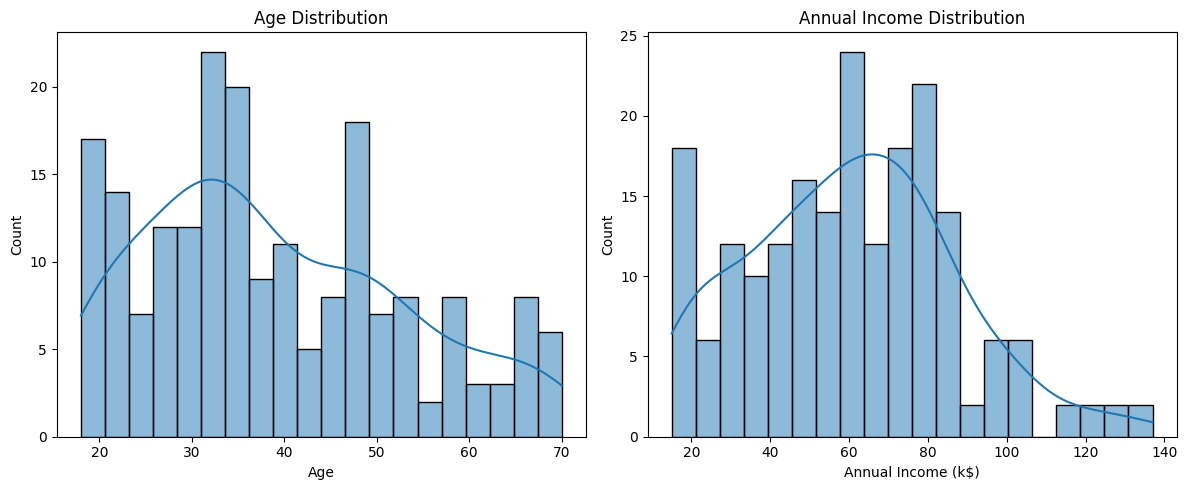

In [4]:
# EDA - Histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title("Annual Income Distribution")
plt.tight_layout()
plt.show()

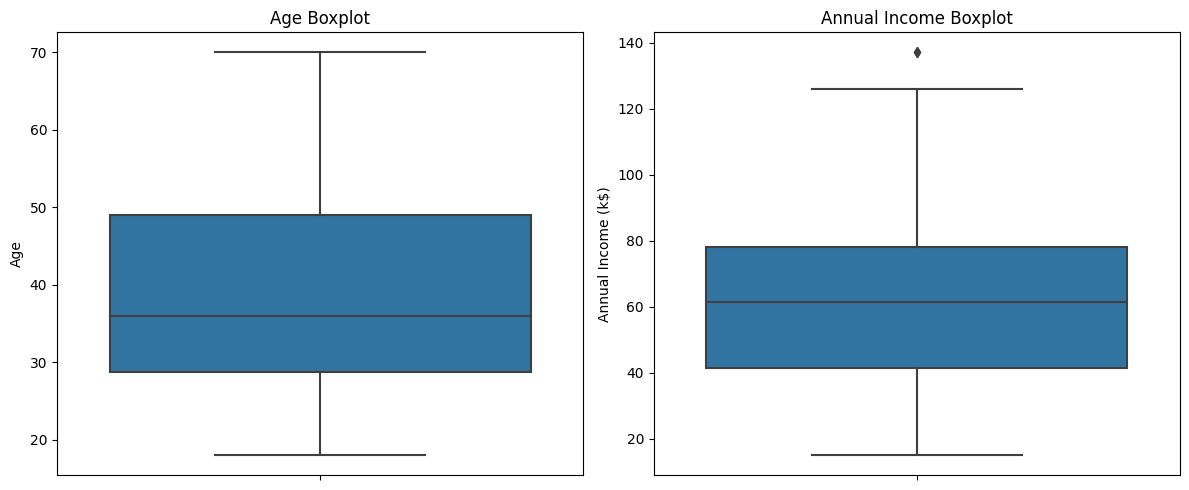

In [5]:
# EDA - Box Plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title("Age Boxplot")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Annual Income (k$)'])
plt.title("Annual Income Boxplot")
plt.tight_layout()
plt.show()

In [6]:
# Feature Selection for Easy Level
X_easy = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [7]:
# K-Means with k=3
kmeans_easy = KMeans(n_clusters=3, random_state=42)
kmeans_easy.fit(X_easy)
df['Cluster_Easy'] = kmeans_easy.labels_

c:\Users\Kinjal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


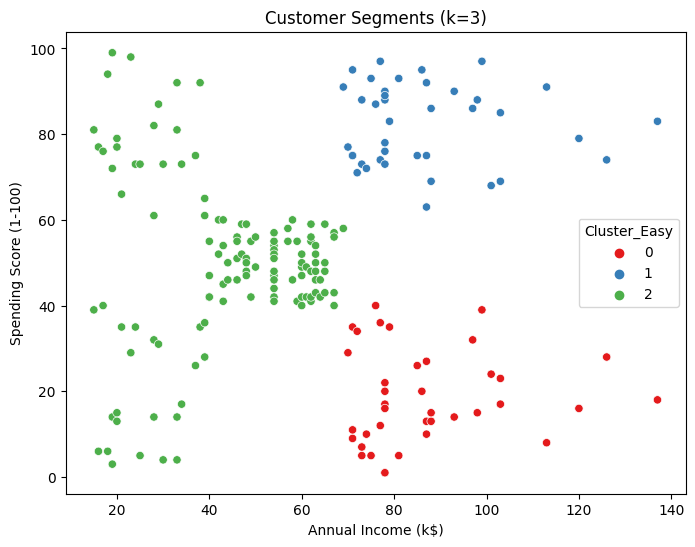

In [8]:
# Visualize Clusters (Easy Level)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_Easy', palette='Set1')
plt.title("Customer Segments (k=3)")
plt.show()

In [9]:
# Preprocessing - Scaling and Encoding
X = df.drop(['CustomerID'], axis=1).copy()
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\Users\Kinjal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Kinjal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Kinjal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Kinjal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

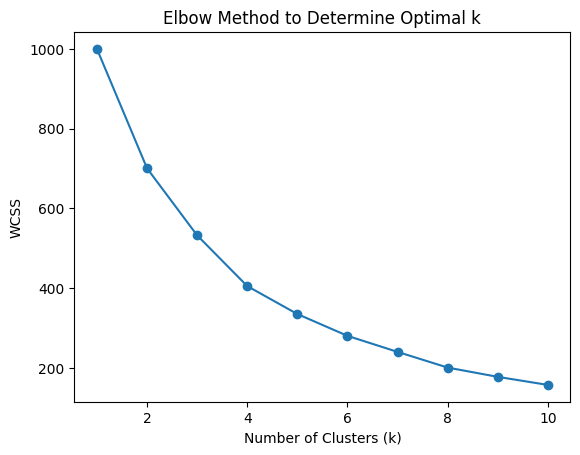

In [10]:
# Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

In [11]:
# Final KMeans with Optimal k=5
kmeans_final = KMeans(n_clusters=5, random_state=42)
clusters = kmeans_final.fit_predict(X_scaled)
df['Cluster_Final'] = clusters

c:\Users\Kinjal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
# Cluster Profiling
profile = df.groupby('Cluster_Final')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
profile

,Age,Annual Income (k$),Spending Score (1-100)
Cluster_Final,,,
0,24.716981,40.018868,61.698113
1,40.394737,87.000000,18.631579
2,49.487805,47.878049,41.048780
3,32.692308,86.538462,82.128205
4,55.896552,46.448276,40.551724


In [13]:
# Silhouette Score (optional)
sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score for k=5: {sil_score:.2f}")

Silhouette Score for k=5: 0.37


In [14]:
# PCA for High-Dimensional Clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans_pca = KMeans(n_clusters=5, random_state=42)
kmeans_pca.fit(X_pca)
labels_pca = kmeans_pca.labels_

c:\Users\Kinjal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


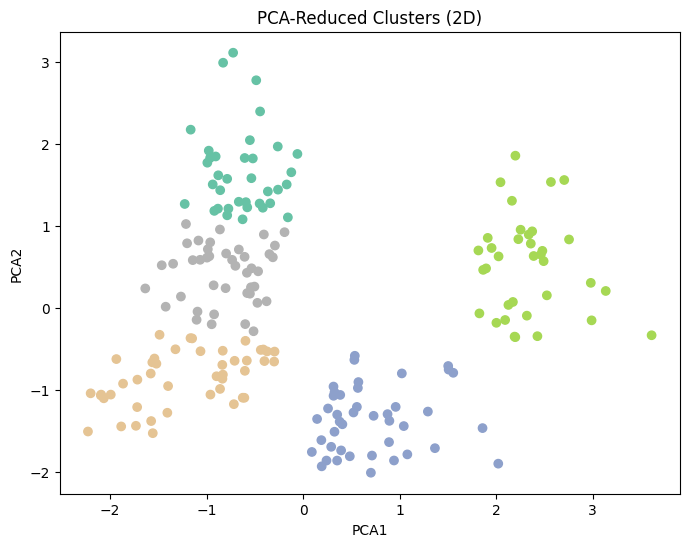

In [15]:
# 2D PCA Cluster Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='Set2')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA-Reduced Clusters (2D)')
plt.show()

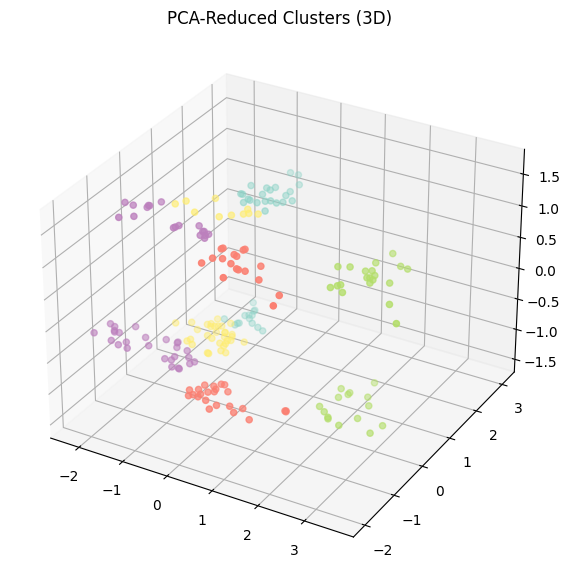

In [16]:
# 3D PCA Cluster Plot (Bonus)
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=labels_pca, cmap='Set3')
ax.set_title('PCA-Reduced Clusters (3D)')
plt.show()

# Business Insights
"""
Business Insights:
1. Each cluster represents a unique customer segment based on spending habits and income levels.
2. High spenders with high income can be targeted with premium product ads.
3. Low spenders with low income could be targeted with discounts or loyalty programs.
4. Younger clusters can be targeted with trendy products and social media campaigns.
5. Clustering helps improve marketing ROI by personalizing offers based on cluster profiles.
"""